In [2]:
import numpy as nm
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import xgboost as xgb
import datetime as dt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [3]:
labels= pd.read_csv("train_labels.csv")
labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [4]:

final_data=pd.DataFrame()
data= pd.read_csv('train_data.csv',nrows=1000000)
data["S_2"]=pd.to_datetime(data["S_2"])
data["Year-Month"] = data["S_2"].dt.to_period('M')
data1=data.groupby('customer_ID').apply(lambda x: x.sample(n=1)).reset_index(drop = True)
final_data=pd.concat([final_data,pd.merge(labels,data1, how= 'inner', on='customer_ID')])



final_data.to_csv("Final_data-Step3.csv")




In [5]:
data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Year-Month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-04
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-05
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-06
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2017-12-01,0.444918,0.214272,0.509806,0.024078,0.001514,0.386644,0.001295,0.920215,...,NaN,NaN,0.000700,0.004486,0.006241,NaN,0.001294,0.006138,0.004346,2017-12
999996,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-01-01,0.445380,0.182068,0.511427,0.025369,0.008337,0.372405,0.002628,0.933117,...,NaN,NaN,0.007064,0.005506,0.005020,NaN,0.006667,0.004177,0.004452,2018-01
999997,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-02-28,0.439738,0.155119,0.497809,0.023311,0.000641,0.389353,0.009791,0.917929,...,NaN,NaN,0.002184,0.004863,0.007474,NaN,0.004654,0.005166,0.000017,2018-02
999998,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-03-31,0.449821,0.155417,0.501278,0.025809,0.006869,0.367082,0.001196,0.926053,...,NaN,NaN,0.000752,0.004426,0.005118,NaN,0.002986,0.000797,0.006316,2018-03


In [6]:
new_Data= final_data[final_data["Year-Month"]=="2018-03"]
print(len(new_Data))
Default_rate = nm.mean(new_Data['target'])
print(Default_rate)

8546
0.28902410484437163


In [7]:
final_data.shape

(82975, 192)

In [8]:
nm.mean(final_data['target'])

0.260825549864417

In [9]:
dtypes=final_data.dtypes

dtypelist = list()

for col in dtypes.index:
    if dtypes[col] == 'object':
        dtypelist.append(col)
        
print(dtypelist)

# final_data['D_63'].value_counts()
# final_data['D_64'].value_counts()


['customer_ID', 'D_63', 'D_64']


In [10]:
size = final_data.size
size

15931200

In [11]:
#One hot encoding

one_hot = pd.get_dummies(final_data[['D_63', 'D_64']])

# Combine the one hot encoded data with the original dataframe
final_data = pd.concat([final_data, one_hot], axis=1)

# Drop the original categorical columns
final_data.drop(['D_63', 'D_64', 'customer_ID'], axis=1, inplace=True)

In [12]:

from sklearn.preprocessing import OrdinalEncoder
for col in['B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_66','D_68']:
    col_dummies=pd.get_dummies(final_data[col],prefix=col)
    final_data=pd.concat([final_data,col_dummies],axis=1)
    final_data.drop(col,axis=1,inplace=True)


In [13]:
final_data.shape

(82975, 225)

In [14]:
# pd.set_option('display.max_columns',None)
# final_data.head()

In [15]:
final_data

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,1,0,0,0,0,0,0,0,0,1
1,0,2017-03-01,0.929122,0.382790,0.025782,1.002647,0.005515,0.089799,0.001479,0.005830,...,1,0,0,0,0,0,0,0,0,1
2,0,2017-11-11,0.797670,0.002817,0.003238,0.819583,0.008977,NaN,0.003330,0.003115,...,1,0,0,0,0,0,0,0,0,1
3,0,2017-08-06,0.594502,0.007465,0.012893,1.001205,0.009915,0.157413,0.006188,0.004458,...,1,0,0,0,0,0,1,0,0,0
4,0,2017-09-22,0.861652,0.007474,0.006711,0.813898,0.000336,NaN,0.004766,0.000812,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82970,1,2017-10-23,0.574043,0.419203,1.117365,0.021132,0.007703,0.177751,0.008778,0.969195,...,1,0,0,0,0,0,0,1,0,0
82971,1,2017-06-22,0.217687,0.007107,0.721968,0.022152,0.507603,0.177678,0.005980,0.977406,...,0,0,0,0,0,0,1,0,0,0
82972,0,2018-01-24,0.205260,0.001096,0.220643,0.049644,0.009036,1.248024,0.007380,0.215941,...,0,0,0,0,0,0,0,0,0,1
82973,1,2017-11-01,0.461739,0.180809,0.513882,0.023612,0.001811,0.374782,0.003630,0.920515,...,1,0,0,0,0,0,0,0,1,0


In [16]:
# dtypes=final_data.dtypes

# dtypelist1 = list()

# for col in dtypes.index:
#     if dtypes[col] == 'object':
#         dtypelist1.append(col)
        
# print(dtypelist1)

# final_data['D_64'].value_counts()

In [17]:
final_data.dtypes

final_data.replace('', nm.nan, inplace=True)


In [18]:
final_data.to_csv("XGBoost_Input_final.csv")

In [19]:
final_data.shape

(82975, 225)

In [20]:
value = final_data['D_42'][1]

print(value)

nan


In [21]:
final_data['Year-Month']

0        2017-09
1        2017-03
2        2017-11
3        2017-08
4        2017-09
          ...   
82970    2017-10
82971    2017-06
82972    2018-01
82973    2017-11
82974    2017-03
Name: Year-Month, Length: 82975, dtype: period[M]

In [22]:
#test-train-test split

train_start_date = '2017-05'
train_end_date = '2018-01'

# Define the start and end dates for the test 1 set
test_start_date = '2017-03'
test_end_date = '2017-04'

# Define the start and end dates for the test 2 setYear-Month
test1_start_date = '2018-02'
test1_end_date = '2018-03'

# Split the data into training and test sets
train_final_data = final_data[(final_data['Year-Month'] >= train_start_date) & (final_data['Year-Month'] <= train_end_date)]
test_final_data = final_data[(final_data['Year-Month'] >= test_start_date) & (final_data['Year-Month'] <= test_end_date)]
test2_final_data = final_data[(final_data['Year-Month'] >= test1_start_date) & (final_data['Year-Month'] <= test1_end_date) ]         

In [23]:
test_final_data['Year-Month'].max()

train_final_data.shape

(55828, 225)

In [24]:
test_final_data['Year-Month']

1        2017-03
5        2017-04
6        2017-03
13       2017-04
18       2017-04
          ...   
82932    2017-03
82961    2017-04
82966    2017-04
82969    2017-04
82974    2017-03
Name: Year-Month, Length: 11082, dtype: period[M]

In [25]:
test2_final_data['Year-Month']

9        2018-02
10       2018-02
12       2018-02
14       2018-03
20       2018-03
          ...   
82938    2018-03
82942    2018-03
82945    2018-03
82950    2018-02
82953    2018-03
Name: Year-Month, Length: 16065, dtype: period[M]

In [26]:
print(sum(train_final_data["target"])/(len(train_final_data["target"])))

0.25999498459554343


In [27]:
train_final_data.shape

train_final_data['target'].dtypes


dtype('int64')

In [28]:
lentrain=len(train_final_data)
DR1 = sum(train_final_data['target'])/lentrain
print(sum(train_final_data['target']))
print("Length of train:",lentrain)
print("Default Rate of train:",DR1)
print("shape: ",train_final_data.shape)

14515
Length of train: 55828
Default Rate of train: 0.25999498459554343
shape:  (55828, 225)


In [29]:
lentest=len(test_final_data)
DR2 = sum(test_final_data['target'])/lentest

print("Length of train:",lentest)
print("Default Rate of train:",DR2)
print(sum(test_final_data['target']))
print("shape: ",test_final_data.shape)


Length of train: 11082
Default Rate of train: 0.2338025627143115
2591
shape:  (11082, 225)


In [30]:
lentest1=len(test2_final_data)
DR3 = sum(test2_final_data['target'])/lentest1

print("Length of train:",lentest1)
print("Default Rate of train:",DR3)
print(sum(test2_final_data['target']))
print("Shape: ",test2_final_data.shape)

Length of train: 16065
Default Rate of train: 0.2823529411764706
4536
Shape:  (16065, 225)


In [31]:
display(train_final_data)

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,1,0,0,0,0,0,0,0,0,1
2,0,2017-11-11,0.797670,0.002817,0.003238,0.819583,0.008977,NaN,0.003330,0.003115,...,1,0,0,0,0,0,0,0,0,1
3,0,2017-08-06,0.594502,0.007465,0.012893,1.001205,0.009915,0.157413,0.006188,0.004458,...,1,0,0,0,0,0,1,0,0,0
4,0,2017-09-22,0.861652,0.007474,0.006711,0.813898,0.000336,NaN,0.004766,0.000812,...,1,0,1,0,0,0,0,0,0,1
7,0,2017-06-02,1.009520,0.004791,0.030036,0.222870,0.008314,0.094183,0.000760,0.094090,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82968,0,2017-11-03,0.976103,0.002395,0.050928,0.009312,0.003564,0.129943,0.000011,0.003718,...,1,0,0,0,0,0,0,0,0,1
82970,1,2017-10-23,0.574043,0.419203,1.117365,0.021132,0.007703,0.177751,0.008778,0.969195,...,1,0,0,0,0,0,0,1,0,0
82971,1,2017-06-22,0.217687,0.007107,0.721968,0.022152,0.507603,0.177678,0.005980,0.977406,...,0,0,0,0,0,0,1,0,0,0
82972,0,2018-01-24,0.205260,0.001096,0.220643,0.049644,0.009036,1.248024,0.007380,0.215941,...,0,0,0,0,0,0,0,0,0,1


In [32]:

# Extract the input features and target variable from the training data
X_train = train_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_train = train_final_data[['target']]

# Extract the input features and target variable from the test data
X_test = test_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_test = test_final_data[['target']]

# Extract the input features and target variable from the test data 1
X_test1 = test2_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_test1 = test2_final_data[['target']]

# Define the XGBoost model
model = xgb.XGBClassifier(random_state=52)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Make predictions on the test data 1
y_pred1 = model.predict(X_test1)

# Evaluate the accuracy of the model on the test data 1
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy on test data 1:", accuracy1)



Accuracy on test data: 0.8580581122541058
Accuracy on test data 1: 0.8633675692499222


In [33]:
X_test1.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
       'D_43',
       ...
       'D_126_1.0', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=222)

In [34]:
X_test1['D_45']

9        0.075384
10       0.013244
12       0.067508
14       0.071628
20       0.012949
           ...   
82938    0.057730
82942    0.164878
82945    0.759262
82950    0.042705
82953    0.148401
Name: D_45, Length: 16065, dtype: float64

In [35]:
X_test['D_45']

1        0.239459
5        0.317302
6        0.006476
13       0.176870
18       0.076816
           ...   
82932    0.060681
82961    0.004656
82966    0.317783
82969    0.317409
82974    0.561051
Name: D_45, Length: 11082, dtype: float64

In [36]:
y_test1['target']

9        1
10       1
12       1
14       0
20       1
        ..
82938    1
82942    0
82945    0
82950    0
82953    0
Name: target, Length: 16065, dtype: int64

In [37]:
#Feature_Importance
importance = model.feature_importances_

print(importance)

feature_importance_df = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])

# sort the dataframe in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# print the dataframe
print(feature_importance_df)

feature_importance_df.to_csv("Feature_Importance_1.csv")


[0.23103616 0.00518782 0.04477808 0.01116603 0.0079173  0.00975707
 0.00603193 0.0114038  0.01924665 0.00639195 0.0047933  0.00772059
 0.01410126 0.00535661 0.00375378 0.00623055 0.00515429 0.00463113
 0.00623911 0.00668139 0.00681088 0.00351257 0.00685481 0.00512357
 0.02779971 0.00501386 0.00420863 0.00454043 0.00292304 0.00321036
 0.00344321 0.00367231 0.00259333 0.00294891 0.00252772 0.00502288
 0.00338084 0.00358826 0.00279491 0.00493208 0.00258918 0.00219815
 0.00274349 0.00367599 0.00308364 0.00258661 0.00249804 0.00955228
 0.00250099 0.00346386 0.00548843 0.00355243 0.0032297  0.00295423
 0.00317869 0.00474911 0.00339026 0.00326985 0.00394148 0.00304388
 0.00258772 0.00325156 0.00305224 0.00300729 0.00290626 0.00296841
 0.00411604 0.0111678  0.00258413 0.00312451 0.00335961 0.01518833
 0.00285971 0.00287424 0.00196461 0.00294226 0.00241281 0.00248415
 0.00280523 0.00475436 0.00278324 0.00242142 0.00284536 0.00282793
 0.00256198 0.00274176 0.00253525 0.00276669 0.00219368 0.0026

In [38]:
X_train.shape

(55828, 222)

In [39]:
# set the hyperparameters
params = {
    'n_estimators': 300,
    'learning_rate': 0.5,
    'max_depth': 4,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5
}

# create the XGBClassifier object with the hyperparameters
model1 = xgb.XGBClassifier(**params)

# train the model on the training set
model1.fit(X_train, y_train)

# # make predictions on the test set
# y_pred = model.predict(X_test)

# print(y_pred)

importance = model1.feature_importances_

print(importance)



[0.09066728 0.00495808 0.00327127 0.00364331 0.00732646 0.01146796
 0.00428374 0.01246363 0.00827903 0.00558746 0.00647013 0.00556065
 0.01243175 0.00482604 0.00351773 0.00456799 0.00441733 0.00538781
 0.00508951 0.00428201 0.04895436 0.00743476 0.00495223 0.00505983
 0.01404354 0.00722865 0.00837224 0.00624648 0.00470223 0.0037911
 0.00440767 0.00637604 0.00332211 0.0037099  0.00310473 0.00430568
 0.00417249 0.00437793 0.00620094 0.00549598 0.00453495 0.00335222
 0.00403197 0.00388843 0.00380249 0.00389086 0.00370659 0.00929049
 0.00451525 0.0031373  0.00414055 0.00353015 0.00398813 0.00468448
 0.00641808 0.00376982 0.00447006 0.00422022 0.00316115 0.00378284
 0.00361413 0.00388118 0.00520495 0.00376652 0.00409967 0.00339376
 0.0042085  0.00511498 0.00373618 0.0034657  0.00346157 0.00322186
 0.00535879 0.00383625 0.00357586 0.0057577  0.00442404 0.00364119
 0.0034718  0.00383994 0.00355971 0.00375538 0.00403261 0.00343118
 0.00342429 0.00378472 0.00335057 0.00356376 0.00424618 0.00359

In [40]:
feature_importance = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])

# sort the dataframe in descending order of importance
feature_importance = feature_importance_df.sort_values(by='importance', ascending=False)

# print the dataframe
print(feature_importance)

        feature  importance
0           P_2    0.231036
2           B_1    0.044778
24          B_9    0.027800
8          D_42    0.019247
71         D_75    0.015188
..          ...         ...
210  D_126_-1.0    0.000000
211   D_126_0.0    0.000000
215    D_68_0.0    0.000000
213    D_66_0.0    0.000000
221    D_68_6.0    0.000000

[222 rows x 2 columns]


In [41]:
feature_importance.to_csv("Feature_Importance2.csv")

In [42]:
df_selected_features = set(feature_importance[feature_importance['importance'] > 0.005]['feature']) | set(feature_importance_df[feature_importance_df['importance']> 0.005]['feature'])
df_selected_features= list(df_selected_features)
df_selected_features



['D_62',
 'D_75',
 'B_2',
 'B_6',
 'S_3',
 'D_112',
 'B_4',
 'D_51',
 'B_23',
 'D_64_O',
 'D_50',
 'P_2',
 'D_41',
 'D_47',
 'R_3',
 'D_43',
 'R_1',
 'D_42',
 'R_26',
 'D_45',
 'B_9',
 'B_3',
 'D_66_1.0',
 'R_27',
 'D_61',
 'B_7',
 'D_132',
 'D_46',
 'B_1',
 'D_49',
 'B_5',
 'D_39',
 'S_7']

In [43]:
# Subset X_train to include only selected features
X_train_selected = X_train[df_selected_features]
X_test_selected= X_test[df_selected_features]
X_test1_selected= X_test1[df_selected_features]

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier(random_state=52,objective='binary:logistic', eval_metric='auc')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1,scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_selected, y_train)




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=52, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

In [44]:
train= []
test1=[]
test2=[]
t=[]
l=[]
s=[]
c=[]
w=[]
scores =pd.DataFrame()

# Create an XGBoost classifier object
for trees in [50,100,300]:
    for LR in [0.01, 0.1]:
        for subsample in [0.5,0.8]:
            for colsample in [0.5,1]:
                for weight in [1,5,10]:
                    model_xgb_test= xgb.XGBClassifier(n_estimators=trees, learning_rate=LR, subsample=subsample,colsample_bytree=colsample, min_child_weight=weight, random_state=42)
                    model_xgb_test.fit(X_train_selected, y_train)
                    t.append(trees)
                    l.append(LR)
                    s.append(subsample)
                    c.append(colsample)
                    w.append(weight)
                    train.append(roc_auc_score(y_train, model_xgb_test.predict(X_train_selected)))
                    test1.append(roc_auc_score(y_test, model_xgb_test.predict(X_test_selected)))
                    test2.append(roc_auc_score(y_test1, model_xgb_test.predict(X_test1_selected)))
scores['trees'] = t
scores['Learning rate'] = l
scores['subsample'] = s
scores['percentage features'] = c
scores['Weight of default'] = w
scores['AUC train 1'] = train
scores['AUC test 1'] = test1
scores['AUC test 2'] = test2
scores.to_csv('XGBoost_scores.csv')

In [45]:
scores

,trees,Learning rate,subsample,percentage features,Weight of default,AUC train 1,AUC test 1,AUC test 2
0,50,0.01,0.5,0.5,1,0.818701,0.770073,0.839866
1,50,0.01,0.5,0.5,5,0.818595,0.769955,0.839465
2,50,0.01,0.5,0.5,10,0.817142,0.769259,0.838850
3,50,0.01,0.5,1.0,1,0.825692,0.781889,0.843652
4,50,0.01,0.5,1.0,5,0.824956,0.781235,0.845612
...,...,...,...,...,...,...,...,...
67,300,0.10,0.8,0.5,5,0.892636,0.789495,0.853878
68,300,0.10,0.8,0.5,10,0.885302,0.786953,0.852141
69,300,0.10,0.8,1.0,1,0.910152,0.782767,0.853260
70,300,0.10,0.8,1.0,5,0.899252,0.785184,0.852519


In [47]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_scale_pos_weight', 'param_subsample', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [48]:

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)
print(grid_search.best_score_)
# print(grid_search.scorer_)

0.92791578139507


In [49]:
grid_search.cv_results_

{'mean_fit_time': array([  7.49458661,   8.94182501,   7.8883883 ,   9.49664121,
          7.88234839,   9.05600314,  16.32900047,  20.41911206,
         16.01450758,  18.02597241,  15.46994405,  18.96880903,
         46.18669634,  53.95826077,  47.08442993,  58.32613139,
         48.13202295,  55.34702492,   7.63000398,   8.97767792,
          7.82967844,   9.47281814,   8.33939886,  11.19322076,
         16.39268761,  21.87748065,  19.39115119,  19.3483182 ,
         15.85428286,  18.87141404,  47.45344701,  56.85473938,
         48.30602241,  56.57305942,  49.89750581,  57.98028026,
         15.68401079,  18.30793982,  15.32874351,  18.71092811,
         15.51798339,  18.77881708,  30.16452289,  36.62112212,
         31.90263977,  41.79111519,  34.473279  ,  39.89571314,
         94.61574817, 115.22451768, 101.14213557, 119.49618316,
         96.32532945, 117.72878709,  15.38959618,  19.7990778 ,
         16.69061322,  20.09553781,  15.77510238,  19.41861825,
         31.81260257,  

In [50]:
#Normalization of data for Neural Networks

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

sc.fit(X_train_selected)

StandardScaler()

In [51]:

results = grid_search.cv_results_
for i in range(len(results['params'])):
    print("Parameters",results['params'][i])
    print("AUC Score",results['mean_test_score'][i])
    


Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.5}
AUC Score 0.9220381083828098
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.8}
AUC Score 0.9218422025575534
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.5}
AUC Score 0.91975729407038
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.8}
AUC Score 0.9197291667863208
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 0.5}
AUC Score 0.9177898251435618
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 0.8}
AUC Score 0.917908201334049
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 100, 'scale_pos_weight': 

In [52]:
results_df = pd.DataFrame({
    'params': results['params'],
    'auc_score': results['mean_test_score']
})

# Write the dataframe to a CSV file
results_df.to_csv('grid_search_results_xgb.csv', index=False)

results_df

,params,auc_score
0,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.922038
1,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.921842
2,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.919757
3,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.919729
4,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.917790
...,...,...
67,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.925952
68,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.923092
69,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.924825
70,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.922291


In [53]:
best_params = grid_search.best_params_
best_auc = grid_search.best_score_
print("Best AUC:", best_auc)
print("Best parameters:", best_params)


Best AUC: 0.92791578139507
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}


In [54]:
#running xgb on hyper parameters
params = {
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 1
}

# Train the model
xgb_best_model = xgb.XGBClassifier(**params)
xgb_best_model.fit(X_train_selected, y_train)
# Evaluate the model
auc_score = roc_auc_score(y_test, xgb_best_model.predict_proba(X_test_selected)[:, 1])
print("AUC score on test data:", auc_score)

auc_score1 = roc_auc_score(y_test1, xgb_best_model.predict_proba(X_test1_selected)[:, 1])
print("AUC score on test 2 data:", auc_score1)





AUC score on test data: 0.917774994669362
AUC score on test 2 data: 0.9402545367918919


In [55]:
#Rank ordering

perf_train_data = pd.DataFrame({"Actual": y_train['target'], "Prediction": xgb_best_model.predict_proba(X_train_selected)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00337]",1,5583,0.000179
"(0.00337, 0.00601]",4,5583,0.000716
"(0.00601, 0.0112]",13,5583,0.002328
"(0.0112, 0.0243]",41,5582,0.007345
"(0.0243, 0.0619]",123,5583,0.022031
"(0.0619, 0.18]",462,5583,0.082751
"(0.18, 0.4]",1407,5582,0.252060
"(0.4, 0.631]",2838,5583,0.508329
"(0.631, 0.814]",4325,5583,0.774673


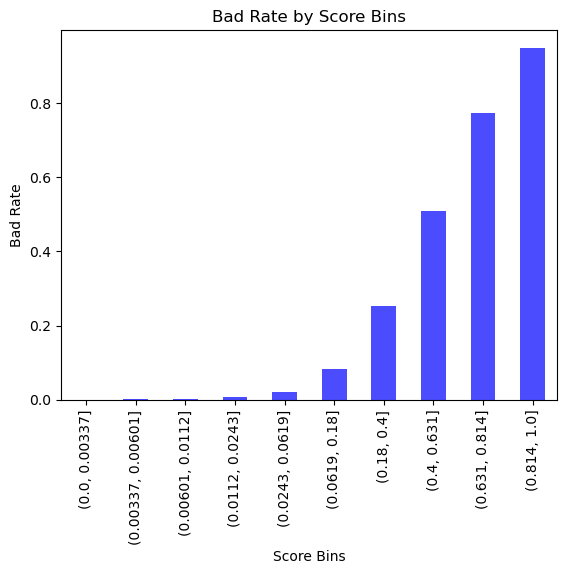

In [56]:
import matplotlib.pyplot as plt

ax = stat.plot(kind='bar', y='Bad Rate', color='blue', alpha=0.7, legend=False)
ax.set_xlabel("Score Bins")
ax.set_ylabel("Bad Rate")
ax.set_title("Bad Rate by Score Bins")

# display the chart
plt.show()

In [57]:
#Get summary stats

def get_summary_statistics(df, column_names):
    summary_stats = pd.DataFrame(columns=["Feature", "Minimum value", "Maximum value", "1 percentile", "5 percentile", "99 percentile", "95 percentile", "Median value", "Mean value", "Missing Value"])
    for column_name in column_names:
        summary_stats = summary_stats.append({
            "Feature": column_name,
            "Minimum value": df[column_name].min(),
            "Maximum value": df[column_name].max(),
            "1 percentile": df[column_name].quantile(0.01),
            "5 percentile": df[column_name].quantile(0.05),
            "99 percentile": df[column_name].quantile(0.99),
            "95 percentile": df[column_name].quantile(0.95),
            "Median value": df[column_name].median(),
            "Mean value": df[column_name].mean(),
            "Missing Value": df[column_name].isnull().sum() / len(df[column_name]) * 100
        }, ignore_index=True)
    return summary_stats

column_name_input = ['P_2','D_45','S_3','B_9','D_42','D_50']
get_summary_statistics(final_data,column_name_input)

/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_97404/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_97404/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_97404/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_97404/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = sum

,Feature,Minimum value,Maximum value,1 percentile,5 percentile,99 percentile,95 percentile,Median value,Mean value,Missing Value
0,P_2,-3.540211e-01,1.009994,0.001205,0.218108,1.005452,0.973860,0.680646,0.648725,1.249774
1,D_45,5.261666e-06,1.567155,0.002799,0.008279,0.993179,0.755202,0.153723,0.237450,0.075926
2,S_3,-3.380120e-01,3.000815,0.006532,0.063307,1.017716,0.618167,0.166007,0.230743,18.336848
3,B_9,7.369665e-09,14.255142,0.000244,0.001204,0.980806,0.650851,0.028445,0.191543,0.000000
4,D_42,-2.278093e-04,4.186066,0.002958,0.007286,1.027596,0.579909,0.117514,0.185351,81.307623
5,D_50,-7.652144e-01,20.166578,0.002235,0.025805,0.991982,0.449143,0.108546,0.168925,57.607713


In [58]:
print(X_test1_selected['D_45'])

9        0.075384
10       0.013244
12       0.067508
14       0.071628
20       0.012949
           ...   
82938    0.057730
82942    0.164878
82945    0.759262
82950    0.042705
82953    0.148401
Name: D_45, Length: 16065, dtype: float64


In [59]:
print(X_test_selected['D_45'])

1        0.239459
5        0.317302
6        0.006476
13       0.176870
18       0.076816
           ...   
82932    0.060681
82961    0.004656
82966    0.317783
82969    0.317409
82974    0.561051
Name: D_45, Length: 11082, dtype: float64


In [60]:
X_train_normalized = sc.transform(X_train_selected)
X_test_normalized = sc.transform(X_test_selected)
X_test1_normalized = sc.transform(X_test1_selected)

In [61]:
#convert to pandas DF
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train_selected.columns)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test_selected.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized,columns=X_test1_selected.columns)

In [62]:
#Outlier Treatment
X_train_normalized.describe(percentiles=[0.01,0.99]).transpose()




,count,mean,std,min,1%,50%,99%,max
D_62,48189.0,-1.074167e-16,1.000010,-0.845450,-0.820717,-0.430038,3.638394,13.777668
D_75,55828.0,-8.896421e-17,1.000009,-0.765725,-0.764539,-0.430422,3.754376,10.999495
B_2,55779.0,7.477520e-17,1.000009,-1.566445,-1.558451,0.477259,0.967569,0.968321
B_6,55818.0,-6.110225e-18,1.000009,-0.223335,-0.213237,-0.093159,1.285272,112.535420
S_3,45622.0,1.915671e-16,1.000011,-2.881064,-1.139953,-0.332569,3.997569,11.829200
D_112,55766.0,-3.449125e-16,1.000009,-2.342649,-2.337388,0.428788,0.444942,0.445272
B_4,55828.0,-3.665478e-17,1.000009,-0.773471,-0.770369,-0.402848,3.761549,12.494887
D_51,55828.0,1.360554e-16,1.000009,-0.591783,-0.591157,-0.561613,3.631422,9.231972
B_23,55828.0,-4.352755e-17,1.000009,-0.748130,-0.742303,-0.483066,3.703861,5.449965
D_64_O,55828.0,6.770952e-17,1.000009,-1.032779,-1.032779,0.968262,0.968262,0.968262


In [63]:
X_test_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
D_62,9467.0,0.024106,1.025060,-0.844205,-0.816770,-0.378554,3.580413,23.525745
D_75,11082.0,-0.040425,0.976330,-0.765714,-0.764696,-0.436095,3.476083,8.875216
B_2,11078.0,0.056946,0.977543,-1.566291,-1.556970,0.478706,0.967644,0.968316
B_6,11082.0,-0.003627,0.727327,-0.219524,-0.212509,-0.081762,1.241203,47.080746
S_3,8975.0,-0.084745,0.913747,-1.935016,-1.135189,-0.354605,3.845363,10.215664
D_112,11078.0,0.013930,0.986731,-2.342529,-2.337321,0.428811,0.444948,0.445272
B_4,11082.0,-0.023498,0.975719,-0.773477,-0.770625,-0.421431,3.728115,8.575579
D_51,11082.0,0.013309,1.020575,-0.591766,-0.591212,-0.561347,3.632092,7.831568
B_23,11082.0,-0.066105,0.940107,-0.748060,-0.742494,-0.529887,3.368483,5.212445
D_64_O,11082.0,-0.010049,1.000319,-1.032779,-1.032779,0.968262,0.968262,0.968262


In [64]:
X_test1_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
D_62,13866.0,-0.048811,0.988677,-0.845349,-0.824784,-0.490066,3.390996,13.789451
D_75,16065.0,0.044823,1.041162,-0.765712,-0.764454,-0.425997,3.774501,9.781580
B_2,16055.0,-0.089347,1.026670,-1.566369,-1.562321,0.474697,0.967429,0.968317
B_6,16054.0,0.025084,1.011876,-0.221541,-0.213567,-0.085343,1.708769,49.640796
S_3,13163.0,0.039034,1.009385,-2.385599,-1.133564,-0.312218,3.935197,14.010590
D_112,16055.0,-0.051896,1.047377,-2.342666,-2.339219,0.428478,0.444903,0.445272
B_4,16065.0,0.039085,1.018012,-0.773482,-0.770325,-0.364603,3.842134,11.568722
D_51,16065.0,-0.054241,0.961936,-0.591777,-0.591221,-0.562872,3.627147,9.241091
B_23,16065.0,0.092795,1.084639,-0.748127,-0.741575,-0.415311,3.986888,5.259023
D_64_O,16065.0,-0.080276,0.999398,-1.032779,-1.032779,-1.032779,0.968262,0.968262


In [65]:
# Get the 1st and 99th percentile values for each column
p1 = X_train_normalized.quantile(0.01)
p99 = X_train_normalized.quantile(0.99)

# Replace values outside the percentile range with the percentile value for each column
X_train_normalized = X_train_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_train_normalized = X_train_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

# Apply the same operation to the test data
X_test_normalized = X_test_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_test_normalized = X_test_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

#Apply to test2 data
X_test1_normalized = X_test1_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_test1_normalized = X_test1_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

In [66]:
X_train_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
D_62,48189.0,-1.060948e-02,0.944455,-0.820717,-0.820714,-0.430038,3.638186,3.638394
D_75,55828.0,-1.089630e-02,0.943937,-0.764539,-0.764539,-0.430422,3.754295,3.754376
B_2,55779.0,3.663197e-05,0.999942,-1.558451,-1.558449,0.477259,0.967569,0.967569
B_6,55818.0,-3.361485e-02,0.220877,-0.213237,-0.213237,-0.093159,1.285047,1.285272
S_3,45622.0,-1.135974e-02,0.922493,-1.139953,-1.139902,-0.332569,3.996685,3.997569
D_112,55766.0,2.124820e-05,0.999954,-2.337388,-2.337386,0.428788,0.444942,0.444942
B_4,55828.0,-1.155608e-02,0.939662,-0.770369,-0.770365,-0.402848,3.761493,3.761549
D_51,55828.0,-7.955249e-03,0.962945,-0.591157,-0.591157,-0.561613,3.631421,3.631422
B_23,55828.0,-5.240230e-03,0.978074,-0.742303,-0.742303,-0.483066,3.703590,3.703861
D_64_O,55828.0,6.770952e-17,1.000009,-1.032779,-1.032779,0.968262,0.968262,0.968262


In [67]:
#Missing Value Imputation
X_train_normalized.fillna(0,inplace=True)
X_test_normalized.fillna(0,inplace=True)
X_test1_normalized.fillna(0,inplace=True)

In [68]:
X_train_normalized.isna().sum()

D_62        0
D_75        0
B_2         0
B_6         0
S_3         0
D_112       0
B_4         0
D_51        0
B_23        0
D_64_O      0
D_50        0
P_2         0
D_41        0
D_47        0
R_3         0
D_43        0
R_1         0
D_42        0
R_26        0
D_45        0
B_9         0
B_3         0
D_66_1.0    0
R_27        0
D_61        0
B_7         0
D_132       0
D_46        0
B_1         0
D_49        0
B_5         0
D_39        0
S_7         0
dtype: int64

In [69]:
#Neural Network-Grid search


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the neural network model
def create_model(hidden_layers=2, nodes_per_layer=4, activation='relu', dropout_rate=0.5):
    model = Sequential()
    for i in range(hidden_layers):
        if i == 0:
            model.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_normalized.shape[1],)))
        else:
            model.add(Dense(nodes_per_layer, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with default parameters
nn_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define the hyperparameters for the grid search
params = {
    'hidden_layers': [2, 4],
    'nodes_per_layer': [4, 6],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0,0.5],
    'batch_size': [100, 10000]
}

# Perform grid search
grid_search = GridSearchCV(nn_model, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X_train_normalized, y_train)

# Print the results
print("Best AUC:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_97404/1480584889.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
2023-04-06 17:19:28.012043: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


349/349 [==============================] - 0s 228us/step


349/349 [==============================] - 0s 241us/step


/Users/sakshisaxena/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sakshisaxena/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sakshisaxena/anaconda3/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/Users/sakshisaxena/anaconda3/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    hi

Best AUC: 0.925265578641231
Best parameters: {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}


In [70]:
results_nn = grid_search.cv_results_
for i in range(len(results_nn['params'])):
    print("Parameters",results_nn['params'][i])
    print("AUC Score",results_nn['mean_test_score'][i])

Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 4}
AUC Score 0.9248547451469868
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 6}
AUC Score 0.9250524641529125
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 4}
AUC Score 0.9242111120448824
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}
AUC Score 0.925265578641231
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 2, 'nodes_per_layer': 4}
AUC Score 0.9111077510508782
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 2, 'nodes_per_layer': 6}
AUC Score 0.9241082809998646
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 4, 'nodes_per_layer': 4}
AUC Score 0.89401523499

In [71]:
results_nn = pd.DataFrame({
    'params': results_nn['params'],
    'auc_score': results_nn['mean_test_score']
})

# Write the dataframe to a CSV file
results_nn.to_csv('grid_search_results_nn.csv', index=False)

results_nn

,params,auc_score
0,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924855
1,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.925052
2,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924211
3,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.925266
4,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.911108
5,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924108
6,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.894015
7,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.906953
8,"{'activation': 'relu', 'batch_size': 10000, 'd...",0.807253
9,"{'activation': 'relu', 'batch_size': 10000, 'd...",0.860644


In [72]:
# Define the hyperparameters for the grid search

# Create empty lists to store results
results_train = []
results_test_1 = []
results_test_2 = []
h= []
nodes=[]
act=[]
drop=[]
batch=[]
scores_nn = pd.DataFrame()

# Nested for loop to iterate through hyperparameters
for hidden_layers in [2,4]:
    for nodes_per_layer in [4,6]:
        for activation in ['relu','tanh']:
            for dropout_rate in [0,0.5]:
                for batch_size in [100,10000]:
                    # Create the model with the current hyperparameters
                    model_nn_test = Sequential()
                    for i in range(hidden_layers):
                        if i == 0:
                            model_nn_test.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_normalized.shape[1],)))
                        else:
                            model_nn_test.add(Dense(nodes_per_layer, activation=activation))
                        if dropout_rate > 0:
                            model_nn_test.add(Dropout(dropout_rate))
                    model_nn_test.add(Dense(1, activation='sigmoid'))
                    model_nn_test.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                    
                    # Train the model on the training data
                    model_nn_test.fit(X_train_normalized, y_train, epochs=20, batch_size=batch_size, verbose=0)
                    
                    #creating lists
                    h.append(hidden_layers)
                    nodes.append(nodes_per_layer)
                    act.append(activation)
                    drop.append(dropout_rate)
                    batch.append(batch_size)
                    # Calculate AUC scores for the training data and the two test datasets
                    y_train_pred = model_nn_test.predict(X_train_normalized)
                    auc_train = roc_auc_score(y_train, y_train_pred)
                    
                    y_test_1_pred = model_nn_test.predict(X_test_normalized)
                    auc_test_1 = roc_auc_score(y_test, y_test_1_pred)
                    
                    y_test_2_pred = model_nn_test.predict(X_test1_normalized)
                    auc_test_2 = roc_auc_score(y_test1, y_test_2_pred)
                    
                    # Store the results in the lists
                    results_train.append(auc_train)
                    results_test_1.append(auc_test_1)
                    results_test_2.append(auc_test_2)

scores_nn['hidden_layers'] = h
scores_nn['nodes_per_layer'] = nodes
scores_nn['activation'] = act
scores_nn['dropout_rate'] = drop
scores_nn['batch_size'] = batch
scores_nn['AUC Train'] = results_train
scores_nn['AUC Test 1'] = results_test_1
scores_nn['AUC Test 2'] = results_test_2
scores_nn.to_csv("Neural_Network_Scores.csv")

503/503 [==============================] - 0s 240us/step


In [73]:
results_train

[0.9255899704664255,
 0.8842717183244699,
 0.9249654396868535,
 0.8614746514053726,
 0.9267695791266557,
 0.8868292686302737,
 0.9238902330018186,
 0.8782407559693234,
 0.9271166034844234,
 0.8837360481665727,
 0.9252732683824993,
 0.8754148652967213,
 0.9273717763500257,
 0.9032755084752906,
 0.9239865920618326,
 0.8741531290171061,
 0.9271400018138667,
 0.8938029980562511,
 0.8692815854872125,
 0.7921886917596448,
 0.9258701392382371,
 0.8850917671524525,
 0.9240694567677842,
 0.8896030988119823,
 0.9268955242077531,
 0.8999751375031236,
 0.9243046148981587,
 0.85338579838803,
 0.9273725592960503,
 0.9000463855913785,
 0.9239259233337085,
 0.9043607000151145]

In [74]:
results_test_1

[0.9100280584055195,
 0.8649500429110107,
 0.9105074862793174,
 0.8486837449200986,
 0.9114713192586916,
 0.8671371840077132,
 0.9096564023723259,
 0.8632513296140608,
 0.9127168317387935,
 0.8680541991904521,
 0.9105027363183967,
 0.8679209957408988,
 0.9119970422061526,
 0.885954211013082,
 0.9096764703890391,
 0.8551874868665854,
 0.9127758312533883,
 0.8802690759680569,
 0.8696025500881106,
 0.7771084246988695,
 0.9106586895807811,
 0.8669869125167652,
 0.9092747464214044,
 0.8705089517218063,
 0.911724726264752,
 0.8820282433130892,
 0.9101302848372019,
 0.8267991976975099,
 0.9109707324680646,
 0.8834334590247236,
 0.9091392929903624,
 0.8887997557838274]

In [75]:
results_test_2

[0.9375757139078618,
 0.8979341528601367,
 0.9375963370798859,
 0.8718995446342426,
 0.9371736050780923,
 0.8962755889870846,
 0.9375727117400289,
 0.8865135526652136,
 0.9381760327419101,
 0.9038591796654798,
 0.9377794788787359,
 0.8792398641077334,
 0.9379230666383352,
 0.9134194875188603,
 0.9375298400184918,
 0.8864064211665912,
 0.9386863725903682,
 0.9007779419982702,
 0.8574775797341356,
 0.794326195363796,
 0.9369954350221502,
 0.8994146996539514,
 0.9375255471097117,
 0.9026779317947243,
 0.9380552098282026,
 0.9164565722846291,
 0.9375025432377184,
 0.8726837032233568,
 0.9375748151697207,
 0.9118860012241197,
 0.9373385235269758,
 0.9137483874343098]

In [76]:
# Print the results
print("Best AUC:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Best AUC: 0.925265578641231
Best parameters: {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}


In [77]:
#Best Neural Network
# Define the neural network model with the best parameters
model_best_nn = Sequential()
model_best_nn.add(Dense(6, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model_best_nn.add(Dropout(0))
model_best_nn.add(Dense(6, activation='relu'))
model_best_nn.add(Dropout(0))
model_best_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_best_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model_best_nn.fit(X_train_normalized, y_train, batch_size=100, epochs=20, verbose=0)

In [78]:
# Evaluate the model
y_pred_nn = model_best_nn.predict(X_test_normalized)



# Evaluate the model on the test data
loss, accuracy = model_best_nn.evaluate(X_test_normalized, y_test)
print(f"Test loss: {loss:.3f}")
print(f"Test accuracy: {accuracy:.3f}")


347/347 [==============================] - 0s 292us/step - loss: 0.3119 - accuracy: 0.8535
Test loss: 0.312
Test accuracy: 0.854


In [79]:
###Strategy#####
Default_rate_train = sum(y_train['target'])/(len(y_train['target']))
Default_rate_test= sum(y_test['target'])/(len(y_test['target']))
Default_rate_test1=sum(y_test1['target'])/(len(y_test1['target']))





print("Default rate for train data is : ",Default_rate_train)
print("Default rate for train data is : ",Default_rate_test)
print("Default rate for train data is : ",Default_rate_test1)

Default rate for train data is :  0.25999498459554343
Default rate for train data is :  0.2338025627143115
Default rate for train data is :  0.2823529411764706


In [80]:
y_test1.columns

Index(['target'], dtype='object')

In [81]:
Data_test1 = pd.DataFrame(y_test1[['target']])

Data_test1.to_csv("Probability_of_default.csv")



In [82]:
len(y_test1)

16065

In [83]:
# Data_test1=Data_test1.sort_values(1)

In [84]:
df_xgb = pd.DataFrame(xgb_best_model.predict_proba(X_test1_selected))

In [85]:
len(Data_test1)

16065

In [86]:
Data_test1.shape

(16065, 1)

In [87]:
df_xgb.shape

(16065, 2)

In [88]:
Data_test1 = Data_test1.reset_index(drop=True)
df_xgb = df_xgb.reset_index(drop=True)

In [89]:
df_new = pd.concat([Data_test1, df_xgb],axis=1)

In [90]:
len(df_new)
df_new.shape

(16065, 3)

In [91]:
default_testing_rate=df_new

In [92]:
from sklearn.metrics import roc_curve



fpr,tpr,threshold= roc_curve(nm.array(y_test1),xgb_best_model.predict(X_test1_selected))

In [93]:
youden_index = tpr-fpr
type(youden_index)

numpy.ndarray

In [94]:
nm.argmax(youden_index)

1

In [95]:
print(fpr,tpr,threshold)

[0.         0.11267239 1.        ] [0.         0.82848325 1.        ] [2 1 0]


In [96]:
threshold[nm.argmax(youden_index)]

1

In [97]:
y_test1['target']

9        1
10       1
12       1
14       0
20       1
        ..
82938    1
82942    0
82945    0
82950    0
82953    0
Name: target, Length: 16065, dtype: int64

In [98]:
import os
os.getcwd()

"/Users/sakshisaxena/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/Spring'23/ML Project"

In [99]:
#Strategy

#def revenue(TH,x,y,TR):
def revenue(TH,x,y):
    df = pd.DataFrame(y)
    df['Prob of 1'] = xgb_best_model.predict_proba(x)[:, 1]
    df['Accepted_customers'] = (df['Prob of 1'] < TH).astype(int)
    df = df[df['Accepted_customers'] == 1]
    balance_feature = x['B_9']
    spend_feature = x['S_3']
    df['B9_Balance'] = balance_feature
    df['S3_Spend'] = spend_feature
    df = df.dropna()
    RR = nm.mean(df['target'])
    df = df.drop(df[df['target'] == 1].index)
    df = df.reset_index(drop=True)
    
    return((sum(df['B9_Balance'])*0.02) + (sum(df['S3_Spend'])*0.001),RR)


a,b = revenue(0.56734,X_test1_selected,y_test1)
print(a)
print(b)

19.19443856180286
0.09921119875569381


In [100]:
input_x = pd.concat([X_train_selected,X_test_selected,X_test1_selected])
input_y = pd.concat([y_train,y_test,y_test1])

In [102]:
pip install shap

ERROR: Could not find a version that satisfies the requirement shap (from versions: none)
ERROR: No matching distribution found for shap
Note: you may need to restart the kernel to use updated packages.


In [101]:
import shap
shap.initjs()
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test1)
shap.plots.beeswarm(shap_values)


ModuleNotFoundError: No module named 'shap'